________________________
# **Online Model Analysis**
________________________

In [1]:
# For each dataset dir, open '{args.network}_train_results.csv'. 
# The 1st row is a header. For each 'split_num', calculate the mean and std of the values in the: 
# 'Acc {args.task}', 'Edit {args.task}', 'F1@10 {args.task}', 'F1@25 {args.task}', 'F1@50 {args.task}' columns
# Then calculate the std and std of the means and stds for each 'split_num' across all datasets
# then print the results using the header in a table in Markdown format
import os
import pandas as pd
import numpy as np

from MetricsBoundedFuture import *
from receptive_field_params_calc import calc

base_dir = '/data/home/gabrielg/BoundedFuture++/Bounded_Future_from_GIT'

run_names = {}
# '02.12.2024 03:04:20  task: gestures splits: all net: MS-TCN2 is RR_or_BF_mode: BF w_max: 1024 use_dynamic_wmax: True',
run_names['VTS']            = [\
                               '02.12.2024 09:48:44  task: gestures splits: all net: MS-TCN2 is RR_or_BF_mode: BF w_max: 0 use_dynamic_wmax: False']
# '02.12.2024 03:04:20  task: gestures splits: all net: MS-TCN2 is RR_or_BF_mode: BF w_max: 1024 use_dynamic_wmax: True',
run_names['JIGSAWS']        = [\
                               '02.12.2024 10:42:43  task: gestures splits: all net: MS-TCN2 is RR_or_BF_mode: BF w_max: 0 use_dynamic_wmax: False']
# '02.12.2024 03:44:14  task: phases splits: all net: MS-TCN2 is RR_or_BF_mode: BF w_max: 1024 use_dynamic_wmax: True',    # <-- phases
# '02.12.2024 03:04:53  task: steps splits: all net: MS-TCN2 is RR_or_BF_mode: BF w_max: 1024 use_dynamic_wmax: True',     # <-- steps
run_names['MultiBypass140'] = [\
                               '02.12.2024 11:07:14  task: phases splits: all net: MS-TCN2 is RR_or_BF_mode: BF w_max: 0 use_dynamic_wmax: False',      # <-- phases
                               \
                               '02.12.2024 10:51:41  task: steps splits: all net: MS-TCN2 is RR_or_BF_mode: BF w_max: 0 use_dynamic_wmax: False']       # <-- steps
# run_names['SAR_RARP50']     = ['02.12.2024 03:04:53  task: gestures splits: all net: MS-TCN2 is RR_or_BF_mode: BF w_max: 1024 use_dynamic_wmax: True']    
# run_names['VTS']            = ['01.12.2024 04:23:56  task: gestures splits: all net: MS-TCN2 is RR_or_BF_mode: BF w_max: 3 use_dynamic_wmax: False',
#                                '01.12.2024 05:19:18  task: gestures splits: all net: MS-TCN2 is RR_or_BF_mode: BF w_max: 15 use_dynamic_wmax: False',
#                                '01.12.2024 06:16:37  task: gestures splits: all net: MS-TCN2 is RR_or_BF_mode: BF w_max: 10 use_dynamic_wmax: False',
#                                '01.12.2024 07:05:15  task: gestures splits: all net: MS-TCN2 is RR_or_BF_mode: BF w_max: 20 use_dynamic_wmax: False',
#                                '01.12.2024 07:14:19  task: gestures splits: all net: MS-TCN2 is RR_or_BF_mode: BF w_max: 3 use_dynamic_wmax: True',
#                                '01.12.2024 07:23:06  task: gestures splits: all net: MS-TCN2 is RR_or_BF_mode: BF w_max: 10 use_dynamic_wmax: True',
#                                '01.12.2024 08:01:19  task: gestures splits: all net: MS-TCN2 is RR_or_BF_mode: BF w_max: 20 use_dynamic_wmax: True',
#                                '01.12.2024 08:22:26  task: gestures splits: all net: MS-TCN2 is RR_or_BF_mode: BF w_max: 15 use_dynamic_wmax: True']
# run_names['JIGSAWS']        = ['01.12.2024 08:17:12  task: gestures splits: all net: MS-TCN2 is RR_or_BF_mode: BF w_max: 3 use_dynamic_wmax: False',
#                                '01.12.2024 08:50:32  task: gestures splits: all net: MS-TCN2 is RR_or_BF_mode: BF w_max: 10 use_dynamic_wmax: False',
#                                '01.12.2024 09:04:29  task: gestures splits: all net: MS-TCN2 is RR_or_BF_mode: BF w_max: 15 use_dynamic_wmax: False',
#                                '01.12.2024 09:22:10  task: gestures splits: all net: MS-TCN2 is RR_or_BF_mode: BF w_max: 20 use_dynamic_wmax: False',
#                                '01.12.2024 09:37:04  task: gestures splits: all net: MS-TCN2 is RR_or_BF_mode: BF w_max: 3 use_dynamic_wmax: True',
#                                '01.12.2024 09:50:17  task: gestures splits: all net: MS-TCN2 is RR_or_BF_mode: BF w_max: 10 use_dynamic_wmax: True',
#                                '01.12.2024 10:22:40  task: gestures splits: all net: MS-TCN2 is RR_or_BF_mode: BF w_max: 15 use_dynamic_wmax: True',
#                                '01.12.2024 10:38:41  task: gestures splits: all net: MS-TCN2 is RR_or_BF_mode: BF w_max: 20 use_dynamic_wmax: True']
# run_names['MultiBypass140'] = ['28.11.2024 18:36:30  task: phases splits: all net: MS-TCN2 is RR_or_BF_mode: BF w_max: 3 use_dynamic_wmax: False',  # <-- phases
#                                '28.11.2024 18:46:07  task: phases splits: all net: MS-TCN2 is RR_or_BF_mode: BF w_max: 10 use_dynamic_wmax: False',
#                                '28.11.2024 18:53:18  task: phases splits: all net: MS-TCN2 is RR_or_BF_mode: BF w_max: 15 use_dynamic_wmax: False',
#                                '28.11.2024 22:49:37  task: phases splits: all net: MS-TCN2 is RR_or_BF_mode: BF w_max: 20 use_dynamic_wmax: False',  
#                                '29.11.2024 15:19:28  task: phases splits: all net: MS-TCN2 is RR_or_BF_mode: BF w_max: 3 use_dynamic_wmax: True' ,
#                                '29.11.2024 15:19:37  task: phases splits: all net: MS-TCN2 is RR_or_BF_mode: BF w_max: 10 use_dynamic_wmax: True',
#                                '29.11.2024 15:19:53  task: phases splits: all net: MS-TCN2 is RR_or_BF_mode: BF w_max: 15 use_dynamic_wmax: True',
#                                '29.11.2024 15:19:57  task: phases splits: all net: MS-TCN2 is RR_or_BF_mode: BF w_max: 20 use_dynamic_wmax: True',
#                                '01.12.2024 01:19:20  task: steps splits: all net: MS-TCN2 is RR_or_BF_mode: BF w_max: 3 use_dynamic_wmax: False',   # <-- steps
#                                '01.12.2024 01:19:20  task: steps splits: all net: MS-TCN2 is RR_or_BF_mode: BF w_max: 10 use_dynamic_wmax: False',
#                                '01.12.2024 01:19:57  task: steps splits: all net: MS-TCN2 is RR_or_BF_mode: BF w_max: 15 use_dynamic_wmax: False',
#                                '01.12.2024 01:19:56  task: steps splits: all net: MS-TCN2 is RR_or_BF_mode: BF w_max: 20 use_dynamic_wmax: False',
#                                '01.12.2024 02:52:18  task: steps splits: all net: MS-TCN2 is RR_or_BF_mode: BF w_max: 3 use_dynamic_wmax: True',
#                                '01.12.2024 03:15:42  task: steps splits: all net: MS-TCN2 is RR_or_BF_mode: BF w_max: 15 use_dynamic_wmax: True',
#                                '01.12.2024 04:19:11  task: steps splits: all net: MS-TCN2 is RR_or_BF_mode: BF w_max: 10 use_dynamic_wmax: True',
#                                '01.12.2024 04:39:51  task: steps splits: all net: MS-TCN2 is RR_or_BF_mode: BF w_max: 20 use_dynamic_wmax: True']
# run_names['SAR_RARP50']     = ['01.12.2024 10:58:22  task: gestures splits: all net: MS-TCN2 is RR_or_BF_mode: BF w_max: 3 use_dynamic_wmax: False',
#                                '01.12.2024 11:07:46  task: gestures splits: all net: MS-TCN2 is RR_or_BF_mode: BF w_max: 10 use_dynamic_wmax: False',
#                                '01.12.2024 11:45:28  task: gestures splits: all net: MS-TCN2 is RR_or_BF_mode: BF w_max: 20 use_dynamic_wmax: False',
#                                '01.12.2024 11:52:54  task: gestures splits: all net: MS-TCN2 is RR_or_BF_mode: BF w_max: 15 use_dynamic_wmax: False',
#                                '01.12.2024 12:03:56  task: gestures splits: all net: MS-TCN2 is RR_or_BF_mode: BF w_max: 10 use_dynamic_wmax: True',
#                                '01.12.2024 12:08:55  task: gestures splits: all net: MS-TCN2 is RR_or_BF_mode: BF w_max: 3 use_dynamic_wmax: True',
#                                '01.12.2024 12:20:09  task: gestures splits: all net: MS-TCN2 is RR_or_BF_mode: BF w_max: 20 use_dynamic_wmax: True',
#                                '01.12.2024 12:43:37  task: gestures splits: all net: MS-TCN2 is RR_or_BF_mode: BF w_max: 15 use_dynamic_wmax: True']


dyn_wmax = -1
wmax_loc = dyn_wmax-2
mode_loc = wmax_loc-2
net_loc  = mode_loc-3
task_loc = 4
# run_names['VTS']            = ['01.11.2024 09:35:27  task:gestures splits: all net: MS-TCN2 is RR_or_BF_mode: BF w_max: 0']
# run_names['JIGSAWS']        = ['01.11.2024 09:35:56  task:gestures splits: all net: MS-TCN2 is RR_or_BF_mode: BF w_max: 0']
# run_names['MultiBypass140'] = ['01.11.2024 10:49:56  task:steps splits: all net: MS-TCN2 is RR_or_BF_mode: BF w_max: 0', # Steps
#                                '01.11.2024 10:50:55  task:phases splits: all net: MS-TCN2 is RR_or_BF_mode: BF w_max: 0']# Phases
# run_names['SAR_RARP50']     = ['01.11.2024 09:37:24  task:gestures splits: all net: MS-TCN2 is RR_or_BF_mode: BF w_max: 0']
# run_name = ['01.11.2024 09:35:27  task:gestures splits: all net: MS-TCN2 is RR_or_BF_mode: BF w_max: 0', # VTS
#             '01.11.2024 09:35:56  task:gestures splits: all net: MS-TCN2 is RR_or_BF_mode: BF w_max: 0', # JIGSAWS
#             '01.11.2024 10:49:56  task:steps splits: all net: MS-TCN2 is RR_or_BF_mode: BF w_max: 0', # MultiBypass140-steps
#             '01.11.2024 10:50:55  task:phases splits: all net: MS-TCN2 is RR_or_BF_mode: BF w_max: 0', # MultiBypass140-phases
#             '01.11.2024 09:37:24  task:gestures splits: all net: MS-TCN2 is RR_or_BF_mode: BF w_max: 0'] # SAR_RARP50 

5053
5053
BF_future_win (sec): 202.12
RR_future_win (sec): 202.12
2
BF_future_win (frames): 2
BF_future_win (sec): 0.08


In [2]:
num_layers          = 10 # PG and R num of layers
num_R               = 3
num_f_maps          = 128
dim                 = 1280
lr                  = 0.0010351748096577         

dataset_args    = {}
# VTS
dataset_args['VTS'] = {}
dataset_args['VTS']['video_hz'] = 30
dataset_args['VTS']['label_hz'] = 30
dataset_args['VTS']['gestures'] = {}
dataset_args['VTS']['gestures']['num_class'] = 10
# JIGSAWS
dataset_args['JIGSAWS'] = {}
dataset_args['JIGSAWS']['video_hz'] = 30
dataset_args['JIGSAWS']['label_hz'] = 30
dataset_args['JIGSAWS']['gestures'] = {}
dataset_args['JIGSAWS']['gestures']['num_class'] = 10
# MultiBypass140
dataset_args['MultiBypass140'] = {}
dataset_args['MultiBypass140']['video_hz'] = 25
dataset_args['MultiBypass140']['label_hz'] = 25
dataset_args['MultiBypass140']['steps'] = {}
dataset_args['MultiBypass140']['phases'] = {}
dataset_args['MultiBypass140']['steps']['num_class'] = 46
dataset_args['MultiBypass140']['phases']['num_class'] = 12
# SAR_RARP50
dataset_args['SAR_RARP50'] = {}
dataset_args['SAR_RARP50']['video_hz'] = 60
dataset_args['SAR_RARP50']['label_hz'] = 10
dataset_args['SAR_RARP50']['gestures'] = {}
dataset_args['SAR_RARP50']['gestures']['num_class'] = 8

| Dataset | Task | w_max | Avg w_max | is online |
|---|---|---|---|---|
| VTS | _Gestures_ | $3$ |  - | False |
| VTS | _Gestures_ | $15$ |  - | False |
| VTS | _Gestures_ | $10$ |  - | False |
| VTS | _Gestures_ | $20$ |  - | False |
| VTS | _Gestures_ | $3$ |  $0.83 ± 0.37$ | True |
| VTS | _Gestures_ | $10$ |  $2.58 ± 0.50$ | True |
| VTS | _Gestures_ | $20$ |  $5.21 ± 0.77$ | True |
| VTS | _Gestures_ | $15$ |  $3.21 ± 0.41$ | True |
| JIGSAWS | _Gestures_ | $3$ |  - | False |
| JIGSAWS | _Gestures_ | $10$ |  - | False |
| JIGSAWS | _Gestures_ | $15$ |  - | False |
| JIGSAWS | _Gestures_ | $20$ |  - | False |
| JIGSAWS | _Gestures_ | $3$ |  $0.77 ± 0.43$ | True |
| JIGSAWS | _Gestures_ | $10$ |  $2.62 ± 0.49$ | True |
| JIGSAWS | _Gestures_ | $15$ |  $4.00 ± 0.51$ | True |
| JIGSAWS | _Gestures_ | $20$ |  $4.87 ± 0.80$ | True |
| MultiBypass140 | _Steps_ | $3$ |  - | False |
| MultiBypass140 | _Steps_ | $10$ |  - | False |
| MultiBypass140 | _Steps_ | $15$ |  - | False |
| MultiBypass140 | _Steps_ | $20$ |  - | False |
| MultiBypass140 | _Steps_ | $3$ |  $0.60 ± 0.49$ | True |
| MultiBypass140 | _Steps_ | $15$ |  $3.80 ± 1.17$ | True |
| MultiBypass140 | _Steps_ | $10$ |  $2.80 ± 0.40$ | True |
| MultiBypass140 | _Steps_ | $20$ |  $5.00 ± 0.90$ | True |
| SAR_RARP50 | _Gestures_ | $3$ |  - | False |
| SAR_RARP50 | _Gestures_ | $10$ |  - | False |
| SAR_RARP50 | _Gestures_ | $20$ |  - | False |
| SAR_RARP50 | _Gestures_ | $15$ |  - | False |
| SAR_RARP50 | _Gestures_ | $10$ |  $2.60 ± 0.81$ | True |
| SAR_RARP50 | _Gestures_ | $3$  |  $1.00 ± 0.00$ | True |
| SAR_RARP50 | _Gestures_ | $20$ |  $4.00 ± 0.90$ | True |
| SAR_RARP50 | _Gestures_ | $15$ |  $4.00 ± 0.64$ | True |

In [3]:
# w_max Look Up Table
w_max_LUT = {}
# VTS
w_max_LUT['VTS'] = {}
w_max_LUT['VTS']['gestures'] = {}
w_max_LUT['VTS']['gestures']['3']  = int(0.83 + 0.37)
w_max_LUT['VTS']['gestures']['3-str'] = "0.83 ± 0.37"
w_max_LUT['VTS']['gestures']['10'] = int(2.58 + 0.50)
w_max_LUT['VTS']['gestures']['10-str'] = "2.58 ± 0.50"
w_max_LUT['VTS']['gestures']['15'] = int(3.21 + 0.41)
w_max_LUT['VTS']['gestures']['15-str'] = "3.21 ± 0.41"
w_max_LUT['VTS']['gestures']['20'] = int(5.21 + 0.77)
w_max_LUT['VTS']['gestures']['20-str'] = "5.21 ± 0.77"
w_max_LUT['VTS']['gestures']['1024'] = int(252.71 + 103.56)
w_max_LUT['VTS']['gestures']['1024-str'] = "252.71 ± 103.56"

# JIGSAWS
w_max_LUT['JIGSAWS'] = {}
w_max_LUT['JIGSAWS']['gestures'] = {}
w_max_LUT['JIGSAWS']['gestures']['3']  = int(0.77 + 0.43)
w_max_LUT['JIGSAWS']['gestures']['3-str'] = "0.77 ± 0.43"
w_max_LUT['JIGSAWS']['gestures']['10'] = int(2.62 + 0.49)
w_max_LUT['JIGSAWS']['gestures']['10-str'] = "2.62 ± 0.49"
w_max_LUT['JIGSAWS']['gestures']['15'] = int(4.00 + 0.51)
w_max_LUT['JIGSAWS']['gestures']['15-str'] = "4.00 ± 0.51"
w_max_LUT['JIGSAWS']['gestures']['20'] = int(4.87 + 0.80)
w_max_LUT['JIGSAWS']['gestures']['20-str'] = "4.87 ± 0.80"
w_max_LUT['JIGSAWS']['gestures']['1024'] = int(274.77 + 44.83)
w_max_LUT['JIGSAWS']['gestures']['1024-str'] = "274.77 ± 44.83"

# SAR_RARP50
w_max_LUT['SAR_RARP50'] = {}
w_max_LUT['SAR_RARP50']['gestures'] = {}
w_max_LUT['SAR_RARP50']['gestures']['3']  = int(1.00 + 0.00)
w_max_LUT['SAR_RARP50']['gestures']['3-str'] = "1.00 ± 0.00"
w_max_LUT['SAR_RARP50']['gestures']['10'] = int(2.60 + 0.81)
w_max_LUT['SAR_RARP50']['gestures']['10-str'] = "2.60 ± 0.81"
w_max_LUT['SAR_RARP50']['gestures']['15'] = int(4.00 + 0.64)
w_max_LUT['SAR_RARP50']['gestures']['15-str'] = "4.00 ± 0.64"
w_max_LUT['SAR_RARP50']['gestures']['20'] = int(4.00 + 0.90)
w_max_LUT['SAR_RARP50']['gestures']['20-str'] = "4.00 ± 0.90"
w_max_LUT['SAR_RARP50']['gestures']['1024'] = int(285.40 + 114.93)
w_max_LUT['SAR_RARP50']['gestures']['1024-str'] = "285.40 ± 114.93"

# MultiBypass140 - steps
w_max_LUT['MultiBypass140'] = {}
w_max_LUT['MultiBypass140']['steps'] = {}
w_max_LUT['MultiBypass140']['steps']['3']  = int(0.60 + 0.49)
w_max_LUT['MultiBypass140']['steps']['3-str'] = "0.60 ± 0.49"
w_max_LUT['MultiBypass140']['steps']['10'] = int(2.80 + 0.40)
w_max_LUT['MultiBypass140']['steps']['10-str'] = "2.80 ± 0.40"
w_max_LUT['MultiBypass140']['steps']['15'] = int(3.80 + 1.17)
w_max_LUT['MultiBypass140']['steps']['15-str'] = "3.80 ± 1.17"
w_max_LUT['MultiBypass140']['steps']['20'] = int(5.00 + 0.90)
w_max_LUT['MultiBypass140']['steps']['20-str'] = "5.00 ± 0.90"
w_max_LUT['MultiBypass140']['steps']['1024'] = int(301.80 + 85.31)
w_max_LUT['MultiBypass140']['steps']['1024-str'] = "301.80 ± 85.31"

# MultiBypass140 - phases
w_max_LUT['MultiBypass140']['phases'] = {}
w_max_LUT['MultiBypass140']['phases']['3']  = int(0.80 + 0.50)
w_max_LUT['MultiBypass140']['phases']['3-str'] = "0.80 ± 0.50"
w_max_LUT['MultiBypass140']['phases']['10'] = int(3.20 + 0.50)
w_max_LUT['MultiBypass140']['phases']['10-str'] = "3.20 ± 0.50"
w_max_LUT['MultiBypass140']['phases']['15'] = int(3.40 + 0.50)
w_max_LUT['MultiBypass140']['phases']['15-str'] = "3.40 ± 0.50"
w_max_LUT['MultiBypass140']['phases']['20'] = int(4.60 + 0.50)
w_max_LUT['MultiBypass140']['phases']['20-str'] = "4.60 ± 0.50"
w_max_LUT['MultiBypass140']['phases']['1024'] = int(311.60 + 116.98)
w_max_LUT['MultiBypass140']['phases']['1024-str'] = "311.60 ± 116.98"




In [4]:
def mean_and_std(full_results, w_max, use_dynamic_wmax, is_online="Yes"):
    mean_and_std = {}
    for metric in ['Acc', 'F1-macro', 'Edit', 'F1@10', 'F1@25', 'F1@50']:
        mean_and_std[f'{metric} {task}'] = {}
        mean_and_std[f'{metric} {task}']['mean'] = full_results[f'{metric} {task}'].mean()
        mean_and_std[f'{metric} {task}']['std'] = full_results[f'{metric} {task}'].std() 

    acc_mean        = mean_and_std[f'Acc {args["task"]}']['mean']
    f1_macro_mean   = mean_and_std[f'F1-macro {args["task"]}']['mean']
    edit_mean       = mean_and_std[f'Edit {args["task"]}']['mean']
    f1_10_mean      = mean_and_std[f'F1@10 {args["task"]}']['mean']
    f1_25_mean      = mean_and_std[f'F1@25 {args["task"]}']['mean']
    f1_50_mean      = mean_and_std[f'F1@50 {args["task"]}']['mean']
    # w_max_mean      = mean_and_std[f'Avg w_max-eval']['mean']

    acc_std         = mean_and_std[f'Acc {args["task"]}']['std']
    f1_macro_std    = mean_and_std[f'F1-macro {args["task"]}']['std']
    edit_std        = mean_and_std[f'Edit {args["task"]}']['std']
    f1_10_std       = mean_and_std[f'F1@10 {args["task"]}']['std']
    f1_25_std       = mean_and_std[f'F1@25 {args["task"]}']['std']
    f1_50_std       = mean_and_std[f'F1@50 {args["task"]}']['std']
    # w_max_std       = mean_and_std[f'Avg w_max-eval']['std']

    if use_dynamic_wmax == "True":
        w_max_str  = f"${w_max_LUT[dataset][task][w_max+'-str']}$"
    else:
        w_max_str  = "-"
        
    mean_and_std['w_max'] = w_max
    mean_and_std['is_online'] = is_online
    ALL_RESULTS = pd.DataFrame(full_results)

    print_str = f"| {is_online} | {task} | _{task.capitalize()}_ | ${w_max}$ | {w_max_str} | ${acc_mean:.2f} ± {acc_std:.2f}$ | ${f1_macro_mean:.2f} ± {f1_macro_std:.2f}$ | ${edit_mean:.2f} ± {edit_std:.2f}$ | ${f1_10_mean:.2f} ± {f1_10_std:.2f}$ | ${f1_25_mean:.2f} ± {f1_25_std:.2f}$ | ${f1_50_mean:.2f} ± {f1_50_std:.2f}$ |"

    return print_str, ALL_RESULTS

In [5]:
DEBUG = False
ALL_RESULTS_original   = pd.DataFrame()
ALL_RESULTS_online     = pd.DataFrame()
for dataset in run_names.keys():
    FIRST_RUN = True
    if run_names[dataset] == []:
        continue
    for run_name in run_names[dataset]:
        # run_name = run_name[0]
        use_dynamic_wmax = run_name.split(' ')[dyn_wmax]
        w_max = run_name.split(' ')[wmax_loc]
        RR_or_BF_mode = run_name.split(' ')[mode_loc]
        net = run_name.split(' ')[net_loc]
        task = run_name.split(' ')[task_loc]
        try:
            future_win,_    = calc(num_layers,
                                   num_layers,
                                   num_R,
                                   w_max_LUT[dataset][task][w_max] if use_dynamic_wmax=='True' else int(w_max),
                                   is_offline=False if RR_or_BF_mode=='BF' else True)
        except KeyError as e:
            print(f"KeyError: {e} not found in w_max_LUT for dataset: {dataset}, task: {task}")
            continue
        future_win = int(future_win/(dataset_args[dataset]['video_hz']/dataset_args[dataset]['label_hz']))
        if DEBUG:
            print(f'run_name: {run_name}')
            print(f'use_dynamic_wmax: {use_dynamic_wmax}')
            print(f'w_max: {w_max}')
            print(f'RR_or_BF_mode: {RR_or_BF_mode}')
            print(f'net: {net}')
            print(f'task: {task}')
            print('='*80)
        # Define the directories and arguments
        base_sum_dir = os.path.join(base_dir, 'output', 'summaries')
        base_model_dir = os.path.join(base_dir, 'output', 'models')
        # Load the model
        # model = MST_TCN2(num_layers_PG, num_layers_R, num_R, num_f_maps, dim, dataset_args[dataset][task]['num_class'], dropout=0.5, w_max=w_max, RR_not_BF_mode=RR_or_BF_mode, use_dynamic_wmax=use_dynamic_wmax)
        
        args = {
            'dataset': dataset,   # options: 'VTS', 'JIGSAWS', 'SAR_RARP50', 'MultiBypass140'
            'network': net,       
            'task': task          # options: [VTS, JIGSAWS, SAR_RARP50]: {'gestures'}, [MultiBypass140]: {'phases', 'setps'}
        }
        # check args
        assert args['dataset'] in ['VTS', 'JIGSAWS', 'SAR_RARP50', 'MultiBypass140'], 'Invalid dataset'
        assert args['task'] in ['gestures', 'phases', 'steps'], 'Invalid task'
        assert args['network'] in ['MS-TCN2'], 'Invalid network'
        assert args['dataset'] in ['VTS', 'JIGSAWS', 'SAR_RARP50'] and args['task'] in ['gestures'] or \
            args['dataset'] in ['MultiBypass140'] and args['task'] in ['phases', 'steps'], 'Invalid task for dataset'
        summaries_dirs  = [os.path.join(base_sum_dir, args['dataset'], args['task'], run_name)]  # Replace with actual dataset directories
        # model_dirs      = [os.path.join(base_model_dir, args['dataset'], args['task'], run_name)]  # Replace with actual dataset directories

        # Process each dataset directory
        for sum_dir in summaries_dirs:
            full_results_original   = pd.DataFrame()
            full_results_online     = pd.DataFrame()
            for split in os.listdir(sum_dir):
                if 'split' in split:
                    split_num = int(split.split('_')[-1])
                    if DEBUG:
                        print(f"Processing split_{split_num} in: {sum_dir}")
                    
                    for pred_dir in os.listdir(os.path.join(sum_dir, split)):
                        # evaluate only the test predictions
                        if 'tst' in pred_dir:
                            for vid_file in os.listdir(os.path.join(sum_dir, split, pred_dir)):
                                # Read the CSV file
                                df = pd.read_csv(os.path.join(sum_dir, split, pred_dir, vid_file), sep='\t')
            
                                # Extract relevant columns
                                columns = [
                                    f'frame_id', 
                                    f'predictions',
                                    f'ground_truth'
                                    ]
                                # Check if all required columns are present
                                missing_columns = [col for col in columns if col not in df.columns]
                                if missing_columns:
                                    print(f"Missing columns in {vid_file}: {missing_columns}")
                                    continue
                                df = df[columns]
                                # # print(f"Processing {vid_file} - Original Results")
                                # res_org, _ = metric_calculation(df['ground_truth'], df['predictions'], task, False) 
                                # res_org['split_num'] = split_num
                                # res_org['list_of_seq'] = vid_file.split('_')[1]
                                # # print(f"Processing {vid_file} - Online Results")
                                res_onl, _ = metric_calculation(df['ground_truth'].shift(-future_win).ffill(), df['predictions'], task, False)
                                res_onl['split_num'] = split_num
                                res_onl['list_of_seq'] = vid_file.split('_')[1]
                                # save the results to two different csv
                                # full_results_original = pd.concat([full_results_original, pd.DataFrame([res_org])], ignore_index=True)
                                full_results_online = pd.concat([full_results_online, pd.DataFrame([res_onl])], ignore_index=True)
        
            # Save the results to a csv
            # full_results_original.to_csv(f'{sum_dir}/{dataset}_{task}_{RR_or_BF_mode}_{w_max}_original.csv', index=False)
            full_results_online.to_csv(f'{sum_dir}/{dataset}_{task}_{RR_or_BF_mode}_{w_max}_online.csv', index=False)

        # Calculate the mean and std of the results
        # print_original_str, mean_and_std_original = mean_and_std(full_results_original, w_max, "No")
        print_online_str, mean_and_std_online = mean_and_std(full_results_online, w_max, use_dynamic_wmax, is_online="Yes")
        # keep the results in a dataframe
        # ALL_RESULTS_original = pd.concat([ALL_RESULTS_original, mean_and_std_original], ignore_index=True)
        ALL_RESULTS_online = pd.concat([ALL_RESULTS_online, mean_and_std_online], ignore_index=True)
        if FIRST_RUN:
            FIRST_RUN = False
            # Print results in Markdown format
            print('=====================')
            print('COPY THE OUTPUT BELOW')
            print('=====================')
            # if dataset=='VTS':
            print (f"# **ONLINE {RR_or_BF_mode}-{net}++ Results**")
            print(f"##### {dataset} - {task.capitalize()}")
            # print(f"##### $PG$ and $R$ num of Layers $={num_layers}$ ")
            # print(f"##### Number of Reinfinment stages $={num_R}$")
            print("| With shift | Dataset | Task | w_max | Avg w_max | Accuracy | F1-Macro | Edit |  F1@10 | F1@25 | F1@50 |")
            print("|---|---|---|---|---|---|---|---|---|---|---|")

        # print(print_original_str)
        print(print_online_str)
        # input("Copy the output!\nPress Enter to continue...")
        # break

0
COPY THE OUTPUT BELOW
# **ONLINE BF-MS-TCN2++ Results**
##### VTS - Gestures
| With shift | Dataset | Task | w_max | Avg w_max | Accuracy | F1-Macro | Edit |  F1@10 | F1@25 | F1@50 |
|---|---|---|---|---|---|---|---|---|---|---|
| Yes | gestures | _Gestures_ | $0$ | - | $82.43 ± 6.49$ | $77.26 ± 10.12$ | $34.51 ± 9.14$ | $48.17 ± 10.69$ | $45.20 ± 11.44$ | $38.41 ± 12.01$ |
0
COPY THE OUTPUT BELOW
# **ONLINE BF-MS-TCN2++ Results**
##### JIGSAWS - Gestures
| With shift | Dataset | Task | w_max | Avg w_max | Accuracy | F1-Macro | Edit |  F1@10 | F1@25 | F1@50 |
|---|---|---|---|---|---|---|---|---|---|---|
| Yes | gestures | _Gestures_ | $0$ | - | $70.48 ± 11.78$ | $61.72 ± 12.49$ | $25.77 ± 8.90$ | $37.82 ± 12.23$ | $34.53 ± 12.59$ | $22.72 ± 12.56$ |
0
COPY THE OUTPUT BELOW
# **ONLINE BF-MS-TCN2++ Results**
##### MultiBypass140 - Phases
| With shift | Dataset | Task | w_max | Avg w_max | Accuracy | F1-Macro | Edit |  F1@10 | F1@25 | F1@50 |
|---|---|---|---|---|---|---|---|---|---|--

# **ONLINE BF-MS-TCN2++ Results**
##### VTS - Gestures
| With shift | Dataset | Task | w_max | Avg w_max | Accuracy | F1-Macro | Edit |  F1@10 | F1@25 | F1@50 |
|---|---|---|---|---|---|---|---|---|---|---|
| No | VTS | _Gestures_ | $0$ | - | $85.06 ± 6.20$ | $80.95 ± 9.47$ | $65.74 ± 12.57$ | $75.42 ± 10.80$ | $73.38 ± 12.54$ | $65.70 ± 15.38$ |
| No | VTS | _Gestures_ | $0$ | - | $82.43 ± 6.49$ | $77.26 ± 10.12$ | $34.51 ± 9.14$ | $48.17 ± 10.69$ | $45.20 ± 11.44$ | $38.41 ± 12.01$ |
| Yes | VTS | _Gestures_ | $3$ | - | $49.37 ± 6.36$ | $35.58 ± 6.29$ | $76.15 ± 9.95$ | $50.43 ± 7.80$ | $38.12 ± 8.84$ | $18.00 ± 6.48$ |
| Yes | VTS | _Gestures_ | $3$ | $0.83 ± 0.37$ | $64.65 ± 6.78$ | $55.15 ± 7.46$ | $72.52 ± 11.08$ | $66.18 ± 10.07$ | $51.27 ± 12.21$ | $25.09 ± 8.52$ |
| Yes | VTS | _Gestures_ | $10$ | - | $26.76 ± 8.02$ | $16.72 ± 5.68$ | $78.16 ± 10.75$ | $29.26 ± 7.51$ | $21.04 ± 7.21$ | $7.56 ± 4.33$ |
| Yes | VTS | _Gestures_ | $10$ | $2.58 ± 0.50$ | $48.99 ± 6.72$ | $35.79 ± 6.41$ | $78.79 ± 10.06$ | $51.85 ± 7.52$ | $38.74 ± 8.48$ | $18.12 ± 6.28$ |
| Yes | VTS | _Gestures_ | $15$ | - | $19.34 ± 7.61$ | $11.21 ± 4.84$ | $79.16 ± 9.92$ | $20.12 ± 8.77$ | $13.42 ± 7.29$ | $4.02 ± 3.34$ |
| Yes | VTS | _Gestures_ | $15$ | $3.21 ± 0.41$ | $49.30 ± 6.34$ | $35.48 ± 6.27$ | $79.57 ± 11.07$ | $51.56 ± 7.84$ | $39.09 ± 8.83$ | $18.73 ± 7.05$ |
| Yes | VTS | _Gestures_ | $20$ | - | $15.94 ± 6.86$ | $8.82 ± 4.55$ | $77.32 ± 9.80$ | $15.44 ± 8.63$ | $9.35 ± 7.19$ | $2.89 ± 3.47$ |
| Yes | VTS | _Gestures_ | $20$ | $5.21 ± 0.77$ | $41.24 ± 7.76$ | $28.13 ± 6.99$ | $81.14 ± 9.28$ | $45.08 ± 8.53$ | $34.70 ± 8.20$ | $14.60 ± 6.39$ |

# **ONLINE BF-MS-TCN2++ Results**
##### JIGSAWS - Gestures
| With shift | Dataset | Task | w_max | Avg w_max | Accuracy | F1-Macro | Edit |  F1@10 | F1@25 | F1@50 |
|---|---|---|---|---|---|---|---|---|---|---|
| No | JIGSAWS | _Gestures_ | $0$ | - | $71.43 ± 13.04$ | $61.63 ± 13.17$ | $51.89 ± 17.06$ | $62.59 ± 17.22$ | $57.69 ± 18.13$ | $40.13 ± 17.82$ |
| No | JIGSAWS | _Gestures_ | $0$ | - | $70.48 ± 11.78$ | $61.72 ± 12.49$ | $25.77 ± 8.90$ | $37.82 ± 12.23$ | $34.53 ± 12.59$ | $22.72 ± 12.56$ |
| Yes | JIGSAWS | _Gestures_ | $3$ | - | $40.07 ± 14.96$ | $28.50 ± 13.34$ | $65.60 ± 13.94$ | $41.50 ± 15.57$ | $29.71 ± 16.54$ | $12.57 ± 11.06$ |
| Yes | JIGSAWS | _Gestures_ | $3$ | $0.77 ± 0.43$ | $64.35 ± 14.46$ | $54.95 ± 14.03$ | $58.79 ± 17.01$ | $64.38 ± 16.21$ | $55.78 ± 17.91$ | $33.33 ± 16.78$ |
| Yes | JIGSAWS | _Gestures_ | $10$ | - | $15.24 ± 5.97$ | $10.19 ± 3.40$ | $65.28 ± 14.63$ | $16.29 ± 8.14$ | $7.48 ± 5.59$ | $2.07 ± 2.94$ |
| Yes | JIGSAWS | _Gestures_ | $10$ | $2.62 ± 0.49$ | $38.78 ± 14.25$ | $27.92 ± 12.11$ | $69.84 ± 15.64$ | $41.50 ± 16.35$ | $30.25 ± 15.21$ | $11.57 ± 10.39$ |
| Yes | JIGSAWS | _Gestures_ | $15$ | - | $24.40 ± 14.88$ | $15.26 ± 9.89$ | $61.53 ± 11.82$ | $28.87 ± 17.33$ | $21.32 ± 17.74$ | $8.14 ± 11.24$ |
| Yes | JIGSAWS | _Gestures_ | $15$ | $4.00 ± 0.51$ | $31.17 ± 12.48$ | $21.61 ± 10.12$ | $70.85 ± 12.59$ | $34.29 ± 15.22$ | $20.91 ± 14.17$ | $7.26 ± 6.98$ |
| Yes | JIGSAWS | _Gestures_ | $20$ | - | $27.89 ± 13.35$ | $17.04 ± 8.98$ | $63.45 ± 10.29$ | $35.43 ± 17.75$ | $25.06 ± 16.09$ | $11.34 ± 10.28$ |
| Yes | JIGSAWS | _Gestures_ | $20$ | $4.87 ± 0.80$ | $24.76 ± 10.37$ | $17.56 ± 8.28$ | $70.86 ± 13.83$ | $27.41 ± 13.93$ | $14.46 ± 10.05$ | $4.35 ± 4.03$ |

# **ONLINE BF-MS-TCN2++ Results**
##### SAR_RARP50 - Gestures
| With shift | Dataset | Task | w_max | Avg w_max | Accuracy | F1-Macro | Edit |  F1@10 | F1@25 | F1@50 |
|---|---|---|---|---|---|---|---|---|---|---|
| No | SAR_RARP50 | _Gestures_ | $0$ | - | $63.81 ± 6.28$ | $40.35 ± 6.50$ | $51.10 ± 15.36$ | $57.20 ± 14.00$ | $51.99 ± 14.90$ | $40.36 ± 17.11$ |
| Yes | SAR_RARP50 | _Gestures_ | $3$ | - | $20.97 ± 4.72$ | $10.32 ± 2.74$ | $16.56 ± 5.88$ | $13.28 ± 6.09$ | $4.07 ± 4.63$ | $1.16 ± 2.31$ |
| Yes | SAR_RARP50 | _Gestures_ | $3$ | $1.00 ± 0.00$ | $21.46 ± 4.82$ | $10.55 ± 3.30$ | $17.81 ± 7.14$ | $13.44 ± 7.60$ | $4.77 ± 5.40$ | $1.69 ± 2.97$ |
| Yes | SAR_RARP50 | _Gestures_ | $10$ | - | $18.27 ± 5.70$ | $9.85 ± 3.81$ | $14.12 ± 4.24$ | $10.67 ± 7.31$ | $3.60 ± 4.21$ | $0.93 ± 2.11$ |
| Yes | SAR_RARP50 | _Gestures_ | $10$ | $2.60 ± 0.81$ | $20.54 ± 5.58$ | $10.21 ± 3.33$ | $15.59 ± 5.63$ | $13.73 ± 7.03$ | $4.93 ± 5.37$ | $1.07 ± 2.15$ |
| Yes | SAR_RARP50 | _Gestures_ | $15$ | - | $18.25 ± 5.96$ | $9.39 ± 3.50$ | $14.64 ± 5.31$ | $10.98 ± 7.24$ | $4.12 ± 4.72$ | $1.18 ± 2.13$ |
| Yes | SAR_RARP50 | _Gestures_ | $15$ | $4.00 ± 0.64$ | $20.19 ± 4.49$ | $10.12 ± 2.67$ | $15.05 ± 4.70$ | $13.25 ± 6.49$ | $3.33 ± 3.74$ | $0.83 ± 1.66$ |
| Yes | SAR_RARP50 | _Gestures_ | $20$ | - | $17.59 ± 6.62$ | $9.09 ± 3.65$ | $13.76 ± 4.30$ | $8.77 ± 6.60$ | $3.08 ± 3.95$ | $0.71 ± 1.57$ |
| Yes | SAR_RARP50 | _Gestures_ | $20$ | $4.00 ± 0.90$ | $20.45 ± 5.22$ | $10.18 ± 3.05$ | $14.59 ± 4.91$ | $12.07 ± 6.36$ | $3.25 ± 4.51$ | $0.40 ± 1.24$ |

# **ONLINE BF-MS-TCN2++ Results**
##### MultiBypass140 - Steps
| With shift | Dataset | Task | w_max | Avg w_max | Accuracy | F1-Macro | Edit |  F1@10 | F1@25 | F1@50 |
|---|---|---|---|---|---|---|---|---|---|---|
| No | MultiBypass140 | _Steps_ | $0$ | - | $71.47 ± 14.57$ | $47.87 ± 14.79$ | $36.92 ± 12.95$ | $43.87 ± 15.34$ | $39.31 ± 15.87$ | $29.66 ± 14.50$ |
| No | MultiBypass140 | _Steps_ | $0$ | - | $68.72 ± 14.15$ | $46.15 ± 15.09$ | $10.96 ± 4.61$ | $15.90 ± 7.59$ | $12.89 ± 7.36$ | $8.17 ± 5.98$ |
| Yes | MultiBypass140 | _Steps_ | $3$ | - | $46.36 ± 11.22$ | $17.14 ± 6.88$ | $50.00 ± 14.76$ | $24.78 ± 9.13$ | $18.14 ± 8.30$ | $8.51 ± 5.34$ |
| Yes | MultiBypass140 | _Steps_ | $3$ | $0.60 ± 0.49$ | $60.92 ± 12.42$ | $30.48 ± 9.92$ | $44.59 ± 14.45$ | $36.73 ± 12.05$ | $28.19 ± 10.42$ | $15.94 ± 7.81$ |
| Yes | MultiBypass140 | _Steps_ | $10$ | - | $25.59 ± 8.61$ | $6.17 ± 2.78$ | $55.59 ± 14.40$ | $11.44 ± 5.17$ | $7.43 ± 4.70$ | $2.43 ± 2.75$ |
| Yes | MultiBypass140 | _Steps_ | $10$ | $2.80 ± 0.40$ | $47.49 ± 10.75$ | $17.53 ± 7.01$ | $56.61 ± 14.73$ | $27.45 ± 10.17$ | $20.15 ± 9.01$ | $9.84 ± 6.44$ |
| Yes | MultiBypass140 | _Steps_ | $15$ | - | $18.21 ± 8.17$ | $3.96 ± 2.23$ | $52.96 ± 13.27$ | $8.14 ± 4.98$ | $4.54 ± 3.78$ | $1.07 ± 1.79$ |
| Yes | MultiBypass140 | _Steps_ | $15$ | $3.80 ± 1.17$ | $41.74 ± 10.17$ | $13.83 ± 5.54$ | $58.55 ± 15.32$ | $22.60 ± 8.81$ | $16.56 ± 7.37$ | $7.52 ± 3.94$ |
| Yes | MultiBypass140 | _Steps_ | $20$ | - | $13.29 ± 8.14$ | $2.80 ± 2.08$ | $53.86 ± 14.08$ | $6.11 ± 4.27$ | $3.29 ± 3.80$ | $0.54 ± 1.36$ |
| Yes | MultiBypass140 | _Steps_ | $20$ | $5.00 ± 0.90$ | $38.29 ± 9.56$ | $11.61 ± 4.80$ | $59.02 ± 14.16$ | $20.39 ± 7.54$ | $14.13 ± 5.77$ | $6.39 ± 3.81$ |

# **ONLINE BF-MS-TCN2++ Compare**
##### **MultiBypass140 - Phases**
| With shift | Dataset | Task | w_max | Avg w_max | Accuracy | F1-Macro | Edit |  F1@10 | F1@25 | F1@50 |
|---|---|---|---|---|---|---|---|---|---|---|
| No | MultiBypass140 | _Phases_ | $0$ | - | $87.76 ± 8.85$ | $68.76 ± 14.79$ | $37.11 ± 17.31$ | $49.00 ± 17.70$ | $46.80 ± 18.39$ | $39.65 ± 17.68$ |
| No | MultiBypass140 | _Phases_ | $0$ | - | $84.49 ± 8.56$ | $64.74 ± 14.17$ | $6.72 ± 3.38$ | $11.33 ± 5.66$ | $9.40 ± 5.53$ | $6.18 ± 4.61$ |
| Yes | MultiBypass140 | _Phases_ | $3$ | - | $76.21 ± 8.07$ | $49.31 ± 11.57$ | $49.91 ± 19.27$ | $49.07 ± 14.81$ | $42.63 ± 13.83$ | $32.52 ± 12.98$ |
| Yes | MultiBypass140 | _Phases_ | $3$ | $0.80 ± 0.40$ | $84.91 ± 7.70$ | $63.37 ± 12.91$ | $46.56 ± 18.08$ | $56.07 ± 17.12$ | $51.89 ± 16.90$ | $39.43 ± 15.17$ |
| Yes | MultiBypass140 | _Phases_ | $10$ | - | $56.58 ± 9.70$ | $29.34 ± 7.78$ | $58.02 ± 17.55$ | $39.64 ± 10.71$ | $32.91 ± 10.85$ | $18.60 ± 11.12$ |
| Yes | MultiBypass140 | _Phases_ | $10$ | $3.20 ± 0.40$ | $76.34 ± 8.12$ | $50.31 ± 11.35$ | $58.41 ± 19.64$ | $55.04 ± 15.01$ | $47.41 ± 13.94$ | $36.83 ± 13.20$ |
| Yes | MultiBypass140 | _Phases_ | 15 | - | $46.51 ± 11.10$ | $22.90 ± 7.12$ | $58.43 ± 17.24$ | $34.86 ± 10.71$ | $28.15 ± 10.97$ | $8.64 ± 9.19$ |
| Yes | MultiBypass140 | _Phases_ | 15 | $3.40 ± 0.80$ | $76.82 ± 7.70$ | $50.84 ± 11.14$ | $60.63 ± 19.91$ | $56.71 ± 15.25$ | $49.81 ± 14.61$ | $38.64 ± 13.32$ 
| Yes | MultiBypass140 | _Phases_ | 20 | - | $38.98 ± 11.84$ | $18.51 ± 6.44$ | $60.42 ± 17.90$ | $30.92 ± 10.06$ | $22.02 ± 11.54$ | $4.07 ± 6.70$ |
| Yes | MultiBypass140 | _Phases_ | 20 | $4.60 ± 1.63$ | $69.54 ± 8.34$ | $41.69 ± 9.95$ | $63.31 ± 18.68$ | $51.48 ± 12.79$ | $45.01 ± 11.55$ | $30.25 ± 11.19$ |

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
data = {}

data['VTS_gestures'] = {
    "With shift": ["No", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes"],
    "w_max": [0, 3, 3, 10, 10, 15, 15, 20, 20],
    "Avg w_max": [None, None, 0.83, None, 2.58, None, 3.21, None, 5.21],
    "Accuracy": [82.43, 49.37, 64.65, 26.76, 48.99, 19.34, 49.30, 15.94, 41.24],
    "Accuracy_std": [6.49, 6.36, 6.78, 8.02, 6.72, 7.61, 6.34, 6.86, 7.76],
    "F1-Macro": [77.26, 35.58, 55.15, 16.72, 35.79, 11.21, 35.48, 8.82, 28.13],
    "F1-Macro_std": [10.12, 6.29, 7.46, 5.68, 6.41, 4.84, 6.27, 4.55, 6.99],
    "Edit": [34.51, 76.15, 72.52, 78.16, 78.79, 79.16, 79.57, 77.32, 81.14],
    "Edit_std": [9.14, 9.95, 11.08, 10.75, 10.06, 9.92, 11.07, 9.80, 9.28],
    "F1@10": [48.17, 50.43, 66.18, 29.26, 51.85, 20.12, 51.56, 15.44, 45.08],
    "F1@10_std": [10.69, 7.80, 10.07, 7.51, 7.52, 8.77, 7.84, 8.63, 8.53],
    "F1@25": [45.20, 38.12, 51.27, 21.04, 38.74, 13.42, 39.09, 9.35, 34.70],
    "F1@25_std": [11.44, 8.84, 12.21, 7.21, 8.48, 7.29, 8.83, 7.19, 8.20],
    "F1@50": [38.41, 18.00, 25.09, 7.56, 18.12, 4.02, 18.73, 2.89, 14.60],
    "F1@50_std": [12.01, 6.48, 8.52, 4.33, 6.28, 3.34, 7.05, 3.47, 6.39]
}

data['JIGSAWS_gestures'] = {
    "With shift": ["No", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes"],
    "w_max": [0, 3, 3, 10, 10, 15, 15, 20, 20],
    "Avg w_max": [None, None, 0.77, None, 2.62, None, 4.00, None, 4.87],
    "Accuracy": [70.48, 40.07, 64.35, 15.24, 38.78, 24.40, 31.17, 27.89, 24.76],
    "Accuracy_std": [11.78, 14.96, 14.46, 5.97, 14.25, 14.88, 12.48, 13.35, 10.37],
    "F1-Macro": [61.72, 28.50, 54.95, 10.19, 27.92, 15.26, 21.61, 17.04, 17.56],
    "F1-Macro_std": [12.49, 13.34, 14.03, 3.40, 12.11, 9.89, 10.12, 8.98, 8.28],
    "Edit": [25.77, 65.60, 58.79, 65.28, 69.84, 61.53, 70.85, 63.45, 70.86],
    "Edit_std": [8.90, 13.94, 17.01, 14.63, 15.64, 11.82, 12.59, 10.29, 13.83],
    "F1@10": [37.82, 41.50, 64.38, 16.29, 41.50, 28.87, 34.29, 35.43, 27.41],
    "F1@10_std": [12.23, 15.57, 16.21, 8.14, 16.35, 17.33, 15.22, 17.75, 13.93],
    "F1@25": [34.53, 29.71, 55.78, 7.48, 30.25, 21.32, 20.91, 25.06, 14.46],
    "F1@25_std": [12.59, 16.54, 17.91, 5.59, 15.21, 17.74, 14.17, 16.09, 10.05],
    "F1@50": [22.72, 12.57, 33.33, 2.07, 11.57, 8.14, 7.26, 11.34, 4.35],
    "F1@50_std": [12.56, 11.06, 16.78, 2.94, 10.39, 11.24, 6.98, 10.28, 4.03]
}

data['SAR_RARP50_gestures'] = {
    "With shift": ["Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes"],
    "w_max": [0, 3, 3, 10, 10, 15, 15, 20, 20],
    "Avg w_max": [None, None, 1.00, None, 2.60, None, 4.00, None, 4.00],
    "Accuracy": [63.81, 20.97, 21.46, 18.27, 20.54, 18.25, 20.19, 17.59, 20.45],
    "Accuracy_std": [6.28, 4.72, 4.82, 5.70, 5.58, 5.96, 4.49, 6.62, 5.22],
    "F1-Macro": [40.35, 10.32, 10.55, 9.85, 10.21, 9.39, 10.12, 9.09, 10.18],
    "F1-Macro_std": [6.50, 2.74, 3.30, 3.81, 3.33, 3.50, 2.67, 3.65, 3.05],
    "Edit": [51.10, 16.56, 17.81, 14.12, 15.59, 14.64, 15.05, 13.76, 14.59],
    "Edit_std": [15.36, 5.88, 7.14, 4.24, 5.63, 5.31, 4.70, 4.30, 4.91],
    "F1@10": [57.20, 13.28, 13.44, 10.67, 13.73, 10.98, 13.25, 8.77, 12.07],
    "F1@10_std": [14.00, 6.09, 7.60, 7.31, 7.03, 7.24, 6.49, 6.60, 6.36],
    "F1@25": [51.99, 4.07, 4.77, 3.60, 4.93, 4.12, 3.33, 3.08, 3.25],
    "F1@25_std": [14.90, 4.63, 5.40, 4.21, 5.37, 4.72, 3.74, 3.95, 4.51],
    "F1@50": [40.36, 1.16, 1.69, 0.93, 1.07, 1.18, 0.83, 0.71, 0.40],
    "F1@50_std": [17.11, 2.31, 2.97, 2.11, 2.15, 2.13, 1.66, 1.57, 1.24],
}
data['MultiBypass_steps'] = {
    "With shift": ["No", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes"],
    "w_max": [0, 3, 3, 10, 10, 15, 15, 20, 20],
    "Avg w_max": [None, None, 0.60, None, 2.80, None, 3.80, None, 5.00],
    "Accuracy": [68.72, 46.36, 60.92, 25.59, 47.49, 18.21, 41.74, 13.29, 38.29],
    "Accuracy_std": [14.15, 11.22, 12.42, 8.61, 10.75, 8.17, 10.17, 8.14, 9.56],
    "F1-Macro": [46.15, 17.14, 30.48, 6.17, 17.53, 3.96, 13.83, 2.80, 11.61],
    "F1-Macro_std": [15.09, 6.88, 9.92, 2.78, 7.01, 2.23, 5.54, 2.08, 4.80],
    "Edit": [10.96, 50.00, 44.59, 55.59, 56.61, 52.96, 58.55, 53.86, 59.02],
    "Edit_std": [4.61, 14.76, 14.45, 14.40, 14.73, 13.27, 15.32, 14.08, 14.16],
    "F1@10": [15.90, 24.78, 36.73, 11.44, 27.45, 8.14, 22.60, 6.11, 20.39],
    "F1@10_std": [7.59, 9.13, 12.05, 5.17, 10.17, 4.98, 8.81, 4.27, 7.54],
    "F1@25": [12.89, 18.14, 28.19, 7.43, 20.15, 4.54, 16.56, 3.29, 14.13],
    "F1@25_std": [7.36, 8.30, 10.42, 4.70, 9.01, 3.78, 7.37, 3.80, 5.77],
    "F1@50": [8.17, 8.51, 15.94, 2.43, 9.84, 1.07, 7.52, 0.54, 6.39],
    "F1@50_std": [5.98, 5.34, 7.81, 2.75, 6.44, 1.79, 3.94, 1.36, 3.81],
}
data['MultiBypass_phases'] = {
    "With shift": ["No", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes"],
    "w_max": [0, 3, 3, 10, 10, 15, 15, 20, 20],
    "Avg w_max": [None, None, 0.8, None, 3.2, None, 3.4, None, 4.6],
    "Accuracy": [84.49, 76.21, 84.91, 56.58, 76.34, 46.51, 76.82, 38.98, 69.54],
    "Accuracy_std": [8.86, 8.07, 7.70, 9.70, 8.12, 11.10, 7.70, 11.84, 8.34],
    "F1-Macro": [64.74, 49.31, 63.37, 29.34, 50.31, 22.90, 50.84, 18.51, 41.69],
    "F1-Macro_std": [14.17, 11.57, 12.91, 7.78, 11.35, 7.12, 11.14, 6.44, 9.95],
    "Edit": [6.72, 49.91, 46.56, 58.02, 58.41, 58.43, 60.63, 60.42, 63.31],
    "Edit_std": [17.31, 19.27, 18.08, 17.55, 19.64, 17.24, 19.91, 17.90, 18.68],
    "F1@10": [11.33, 49.07, 56.07, 39.64, 55.04, 34.86, 56.71, 30.92, 51.48],
    "F1@10_std": [5.66, 14.81, 17.12, 10.71, 15.01, 10.71, 15.25, 10.06, 12.79],
    "F1@25": [9.40, 42.63, 51.89, 32.91, 47.41, 28.15, 49.81, 22.02, 45.01],
    "F1@25_std": [5.53, 13.83, 16.90, 10.85, 13.94, 10.97, 14.61, 11.54, 11.55],
    "F1@50": [6.18, 32.52, 39.43, 18.60, 36.83, 8.64, 38.64, 4.07, 30.25],
    "F1@50_std": [4.61, 12.98, 15.17, 11.12, 13.20, 9.19, 13.32, 6.70, 11.19]
}

In [13]:
def plot_metrics(data):
    for dataset in data:
        # Create DataFrame
        df = pd.DataFrame(data[dataset])
        dataset_str = dataset.split('_')[0]
        task_str = dataset.split('_')[1].capitalize()
        # Convert Avg w_max to numeric
        df["Avg w_max"] = pd.to_numeric(df["Avg w_max"], errors="coerce")

        # Separate data
        baseline = df[df["w_max"] == 0]  # Baseline data
        df_without_avg = df[df["Avg w_max"].isnull()]  # Data without Avg w_max
        df_without_avg_no_baseline = df_without_avg[df_without_avg["w_max"] != 0]  # Exclude baseline
        df_with_avg = df[df["Avg w_max"].notnull()]  # Data with Avg w_max

        # List of metrics to plot
        metrics = ["Accuracy", "F1-Macro", "Edit", "F1@10", "F1@25", "F1@50"]

        print("="*80)
        print(f"{dataset_str} - {task_str}")
        print("="*80)
        # Plot each metric with baseline
        for metric in metrics:
            plt.figure(figsize=(10, 6))

            # Add baseline as a horizontal grey line and blue point
            baseline_value = baseline[metric].values[0] if not baseline.empty else 0
            baseline_std = baseline[f"{metric}_std"].values[0] if not baseline.empty else 0
            plt.axhline(y=baseline_value, color="grey", linestyle="--", label=f"Baseline (w_max=0: {baseline_value:.2f} ± {baseline_std:.2f})")
            plt.errorbar(0, baseline_value, yerr=baseline_std, fmt="o", color="blue", zorder=5, label="Baseline Point (w_max=0)")

            # Plot for data without Avg w_max (excluding baseline)
            plt.errorbar(df_without_avg_no_baseline["w_max"], df_without_avg_no_baseline[metric], 
                    yerr=df_without_avg_no_baseline[f"{metric}_std"], fmt="o", label=f"{metric} (No Avg w_max)", linestyle="-")

            # Plot for data with Avg w_max
            plt.errorbar(df_with_avg["w_max"], df_with_avg[metric], 
                    yerr=df_with_avg[f"{metric}_std"], fmt="o", label=f"{metric} (With Avg w_max)", linestyle="--")

            # Add titles and labels
            plt.title(f"{dataset_str} - {task_str}\n{metric} vs w_max (Baseline: grey line, blue point)")
            plt.xlabel("w_max")
            plt.ylabel(f"{metric} (%)")
            plt.grid(True)
            plt.legend()
            plt.show()

VTS - Gestures


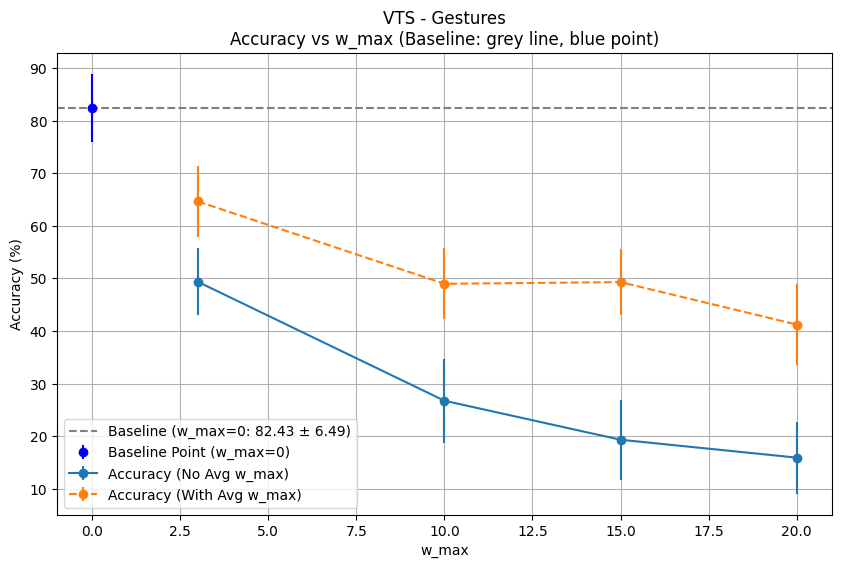

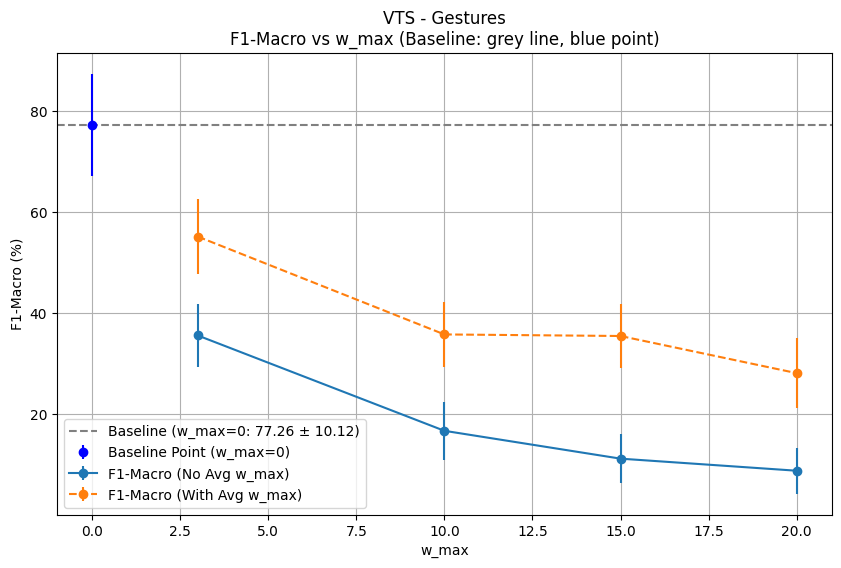

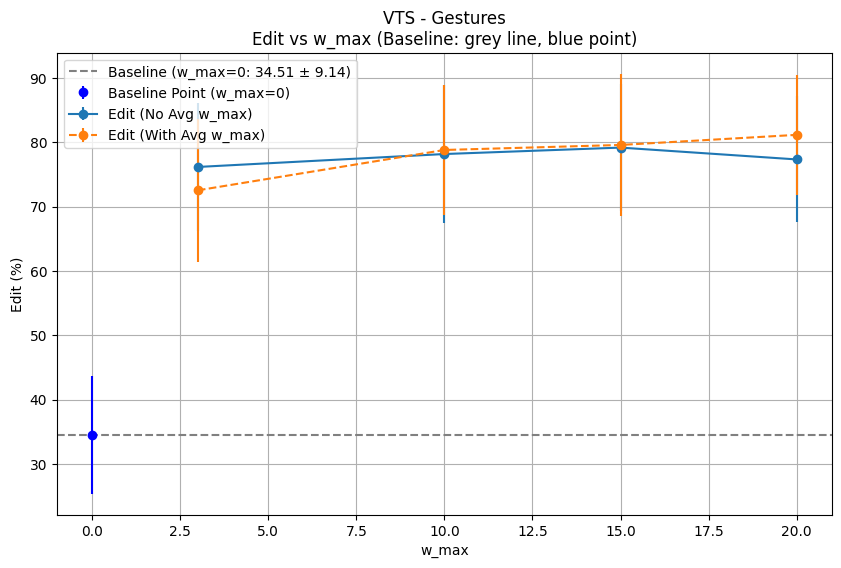

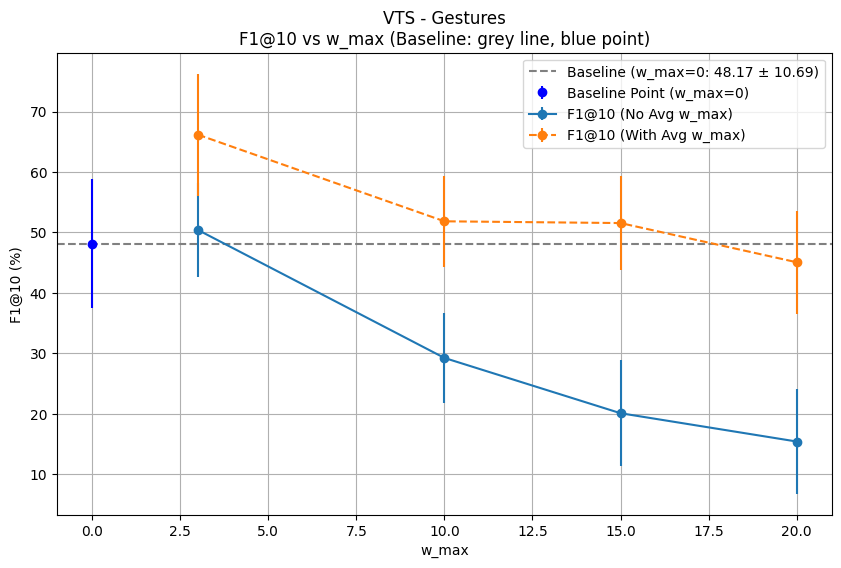

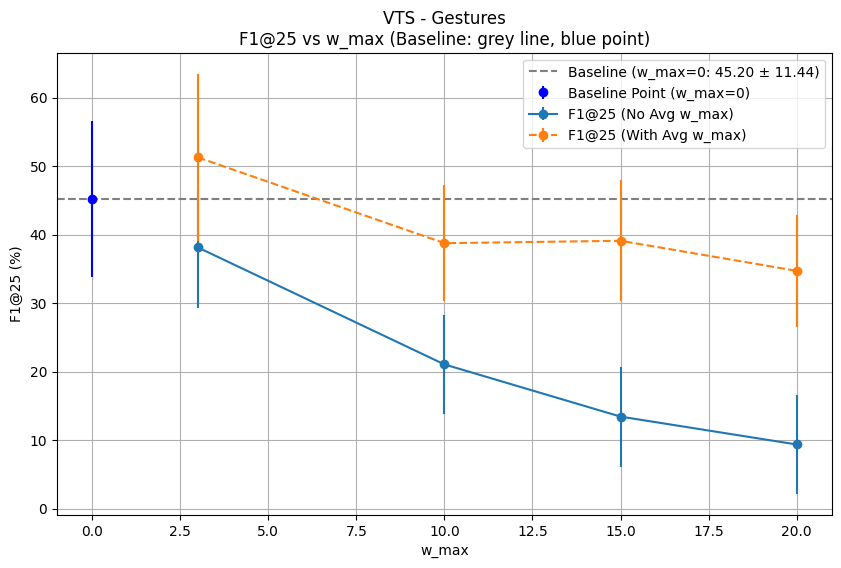

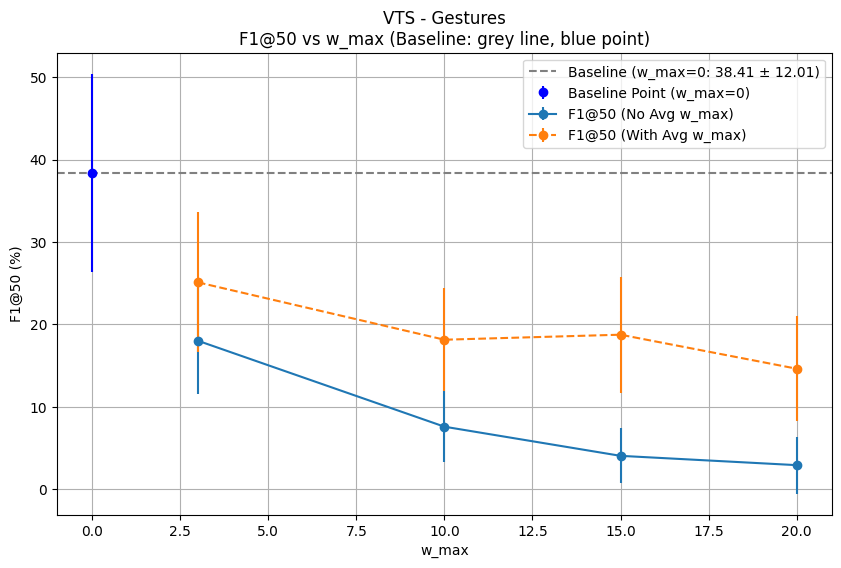

JIGSAWS - Gestures


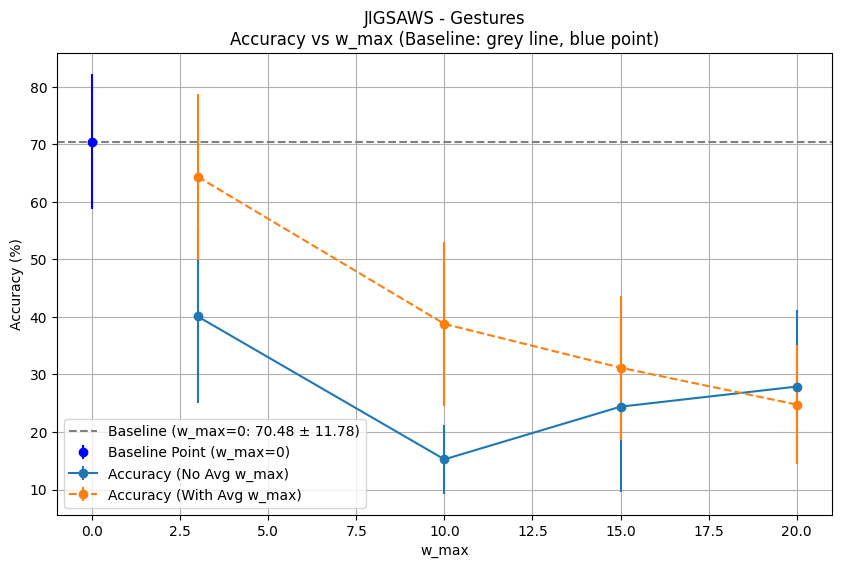

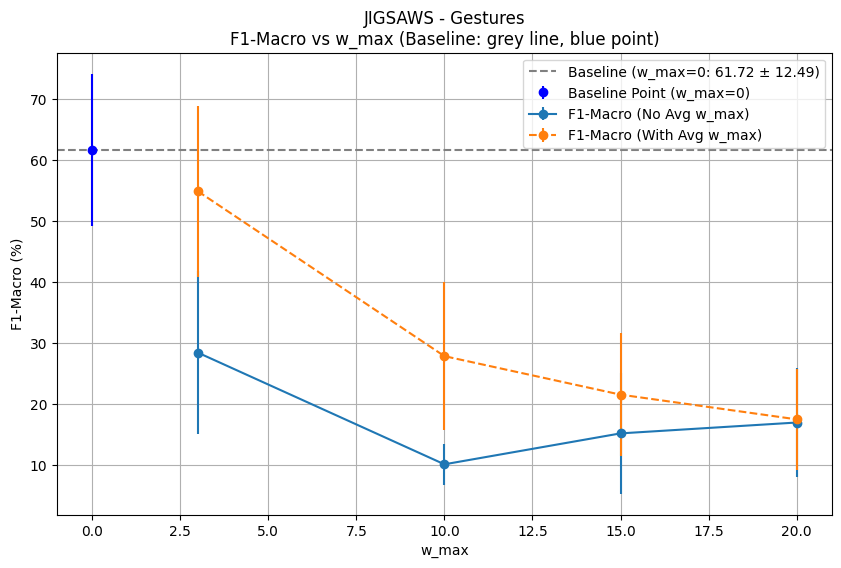

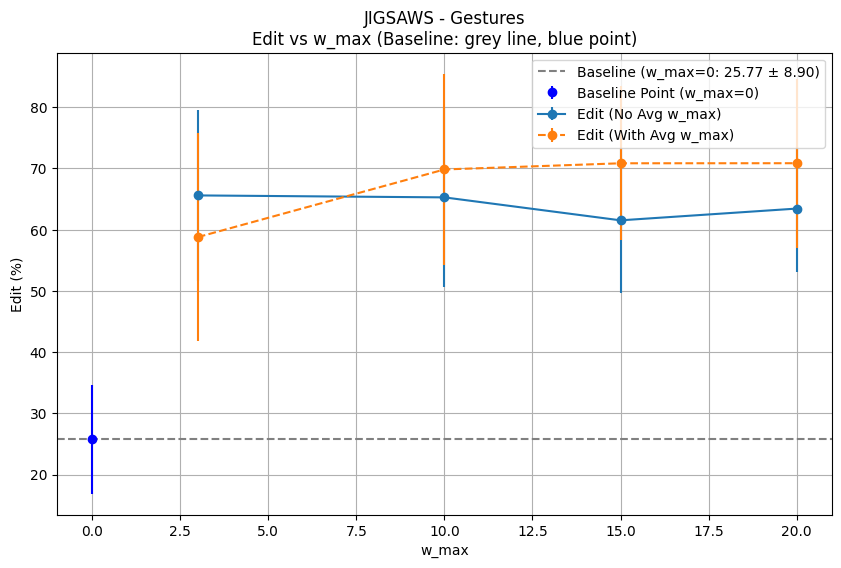

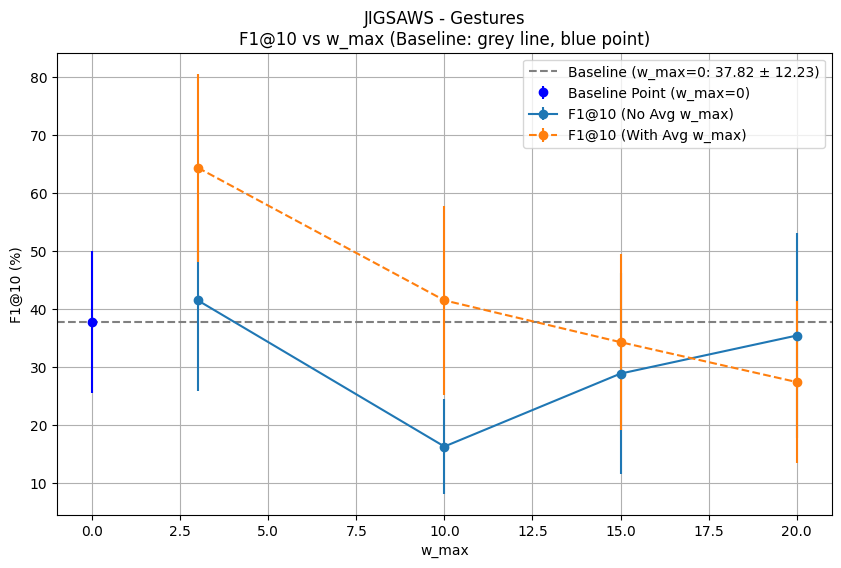

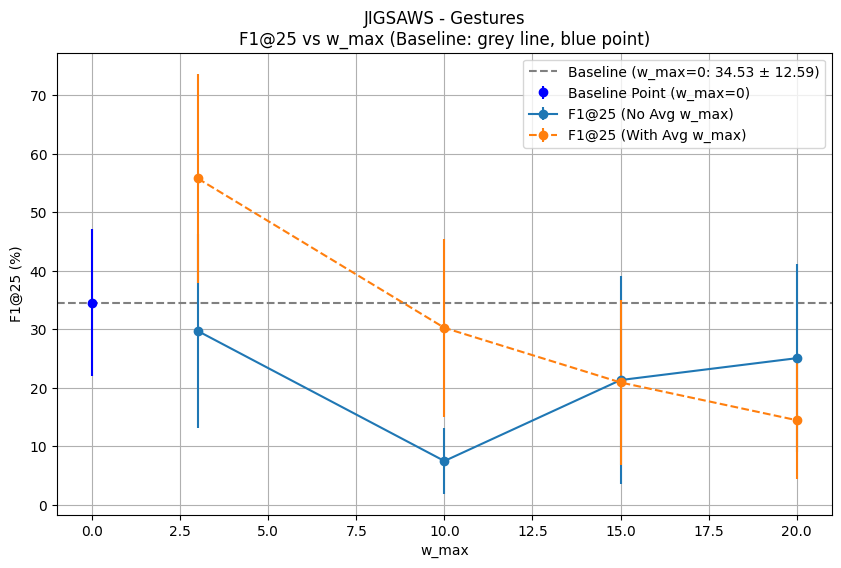

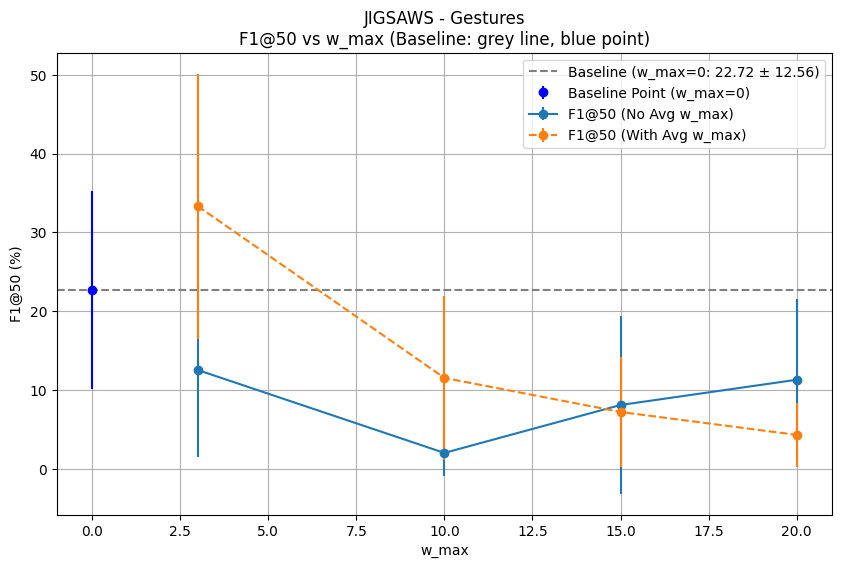

SAR - Rarp50


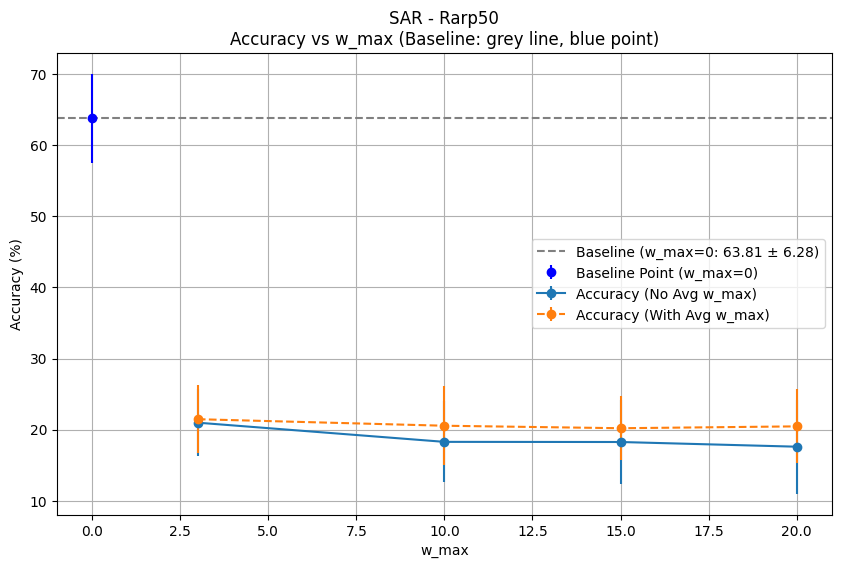

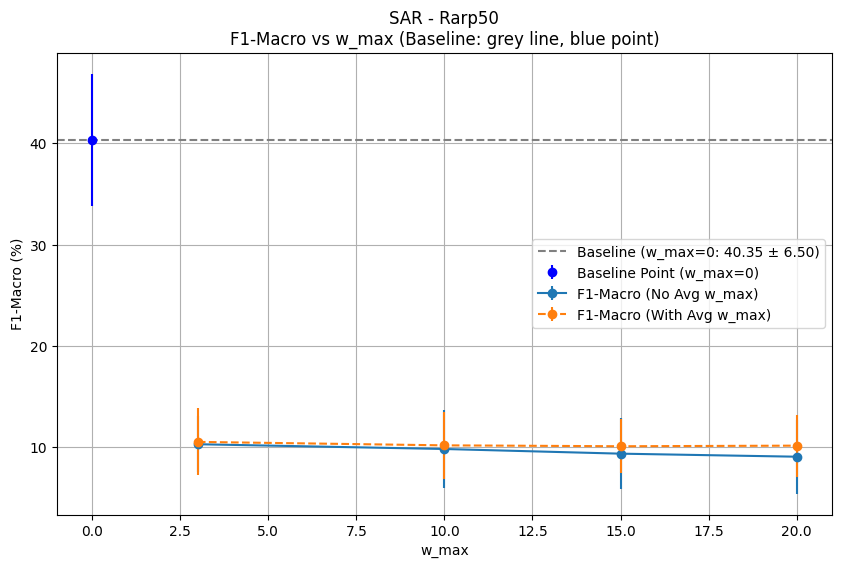

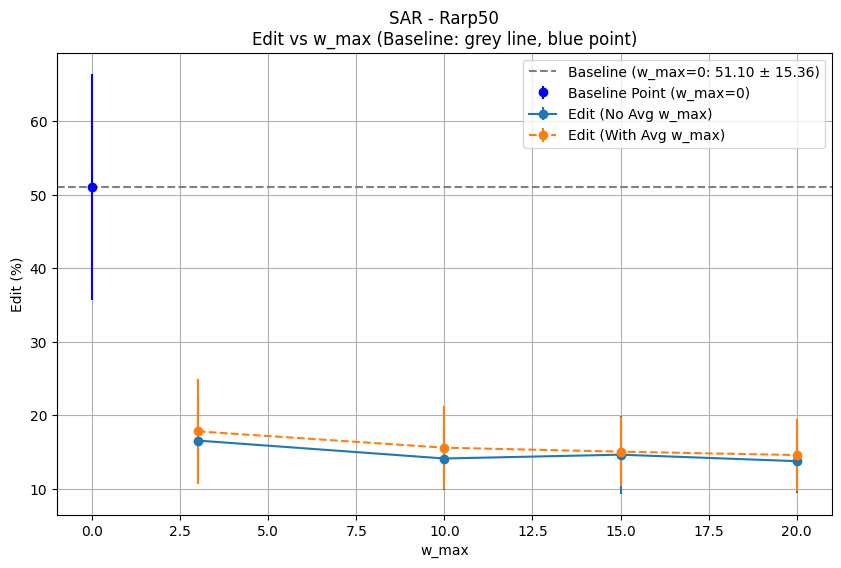

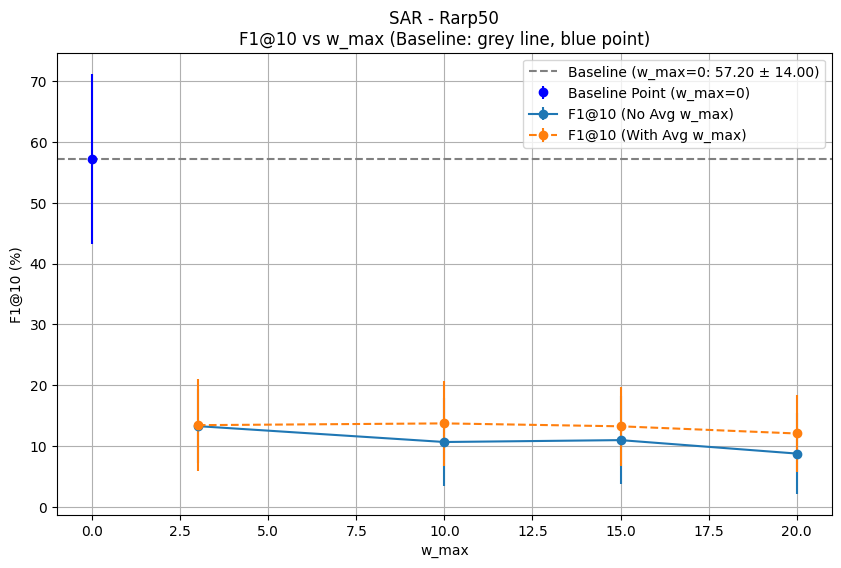

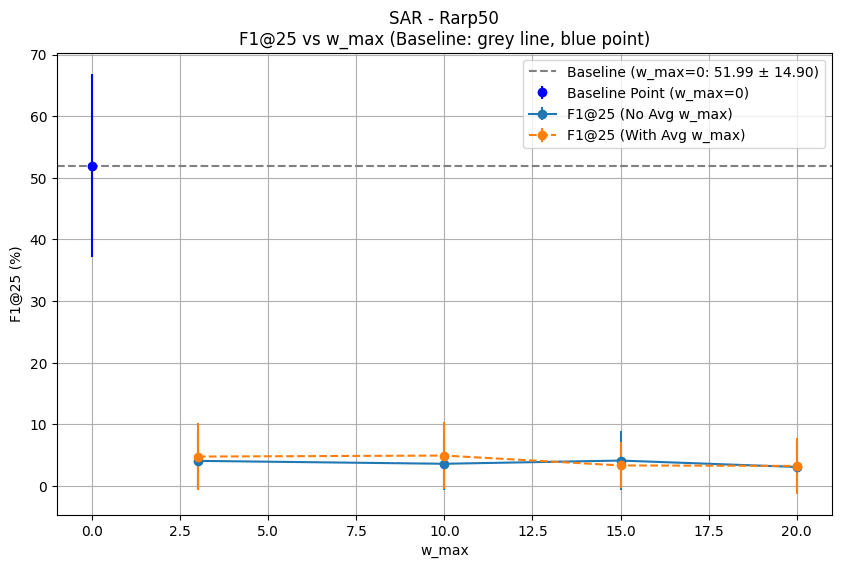

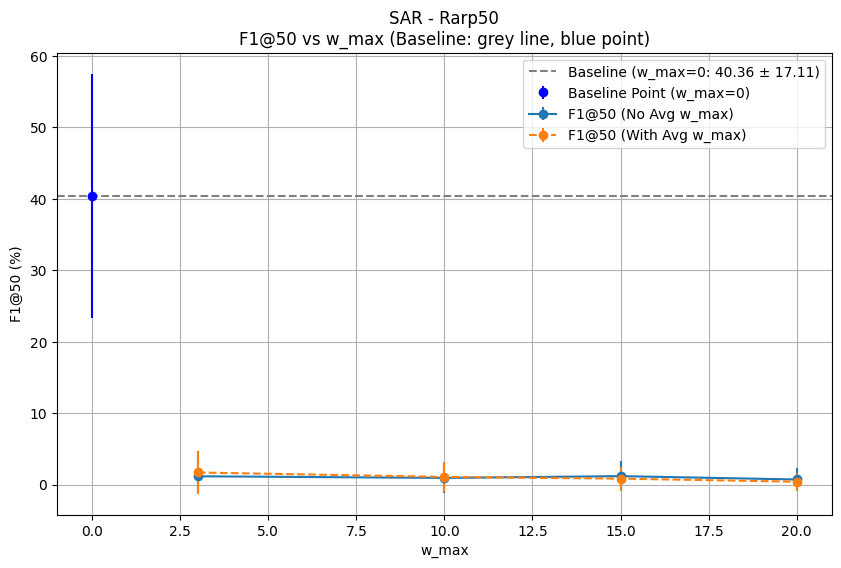

MultiBypass - Steps


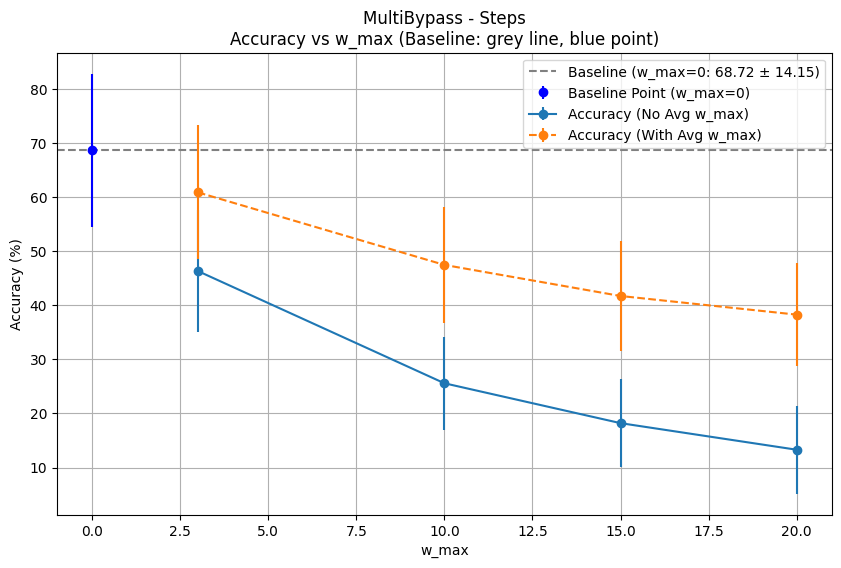

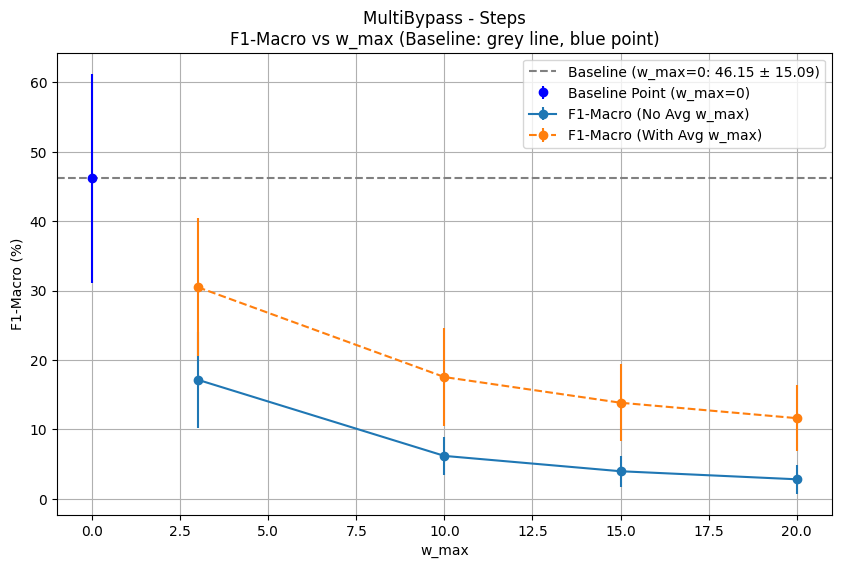

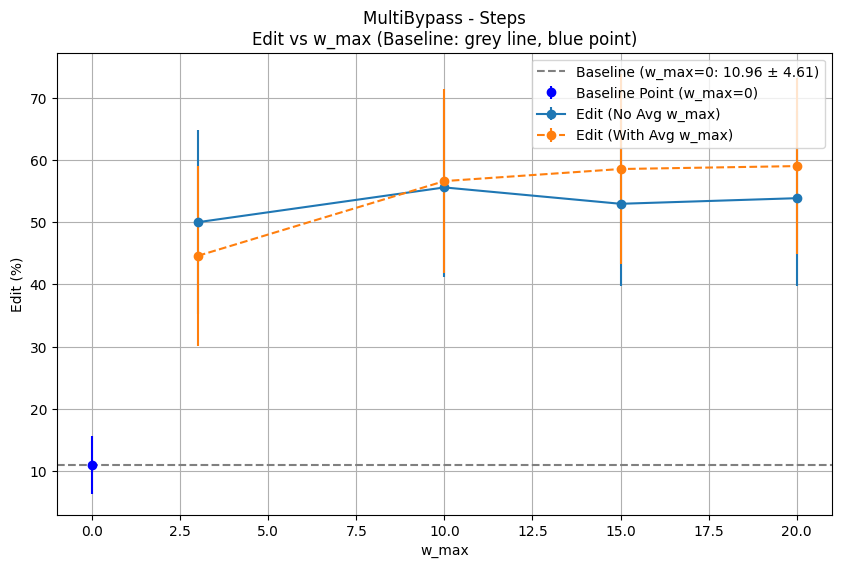

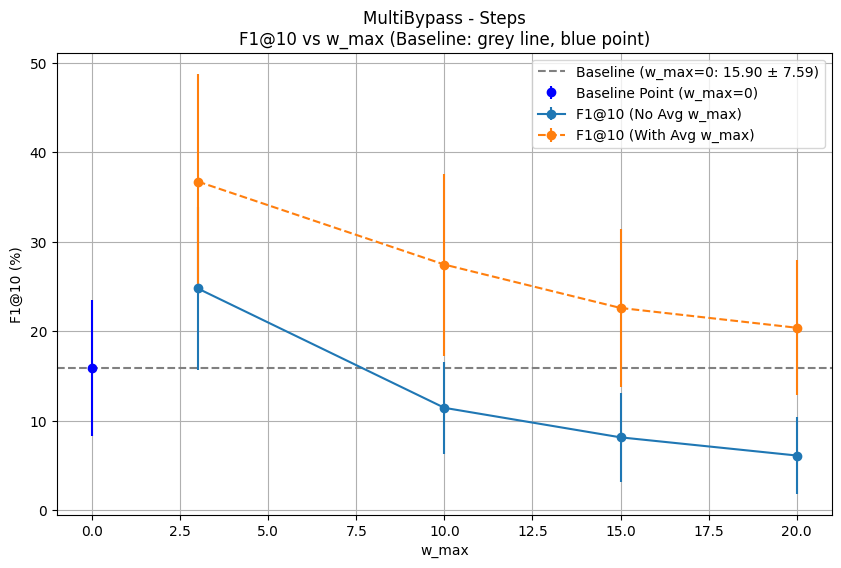

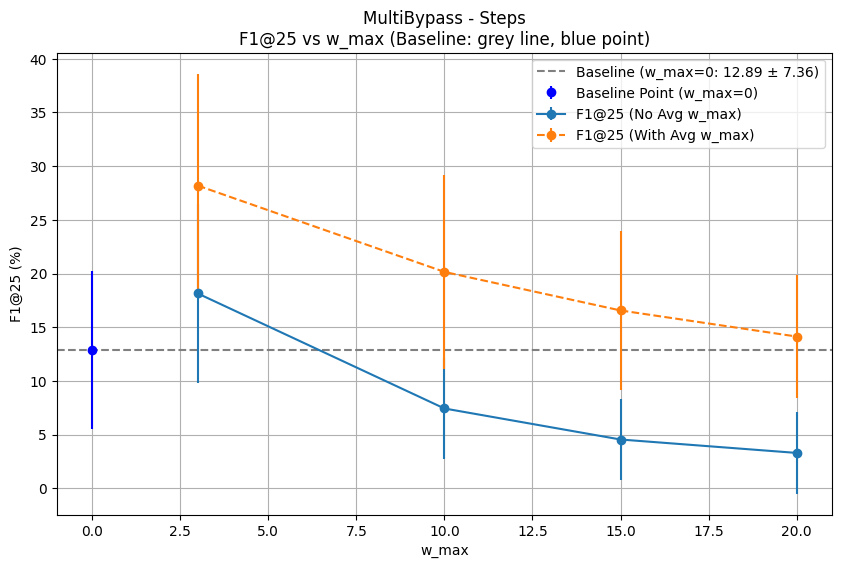

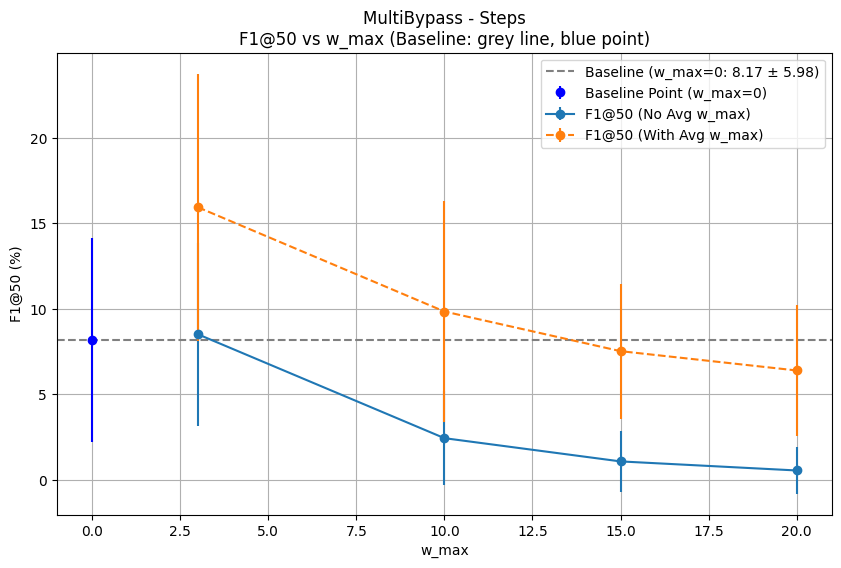

MultiBypass - Phases


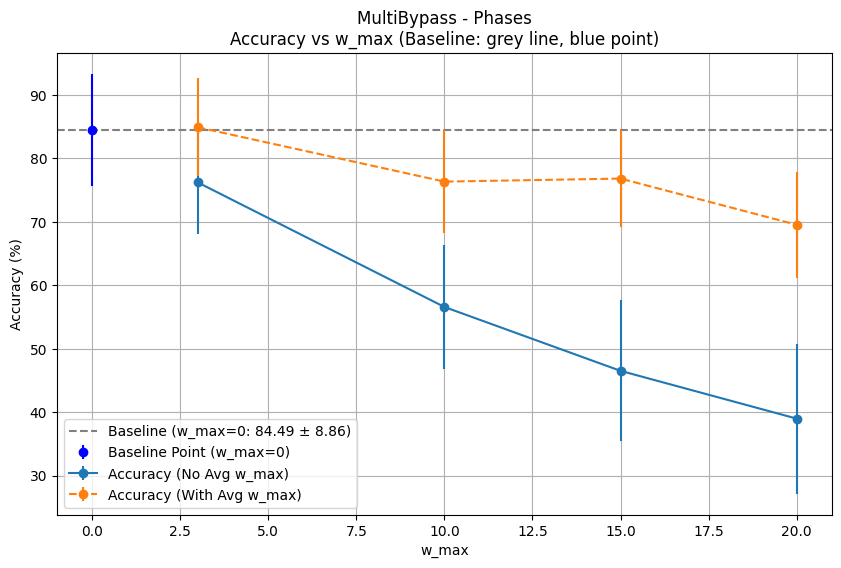

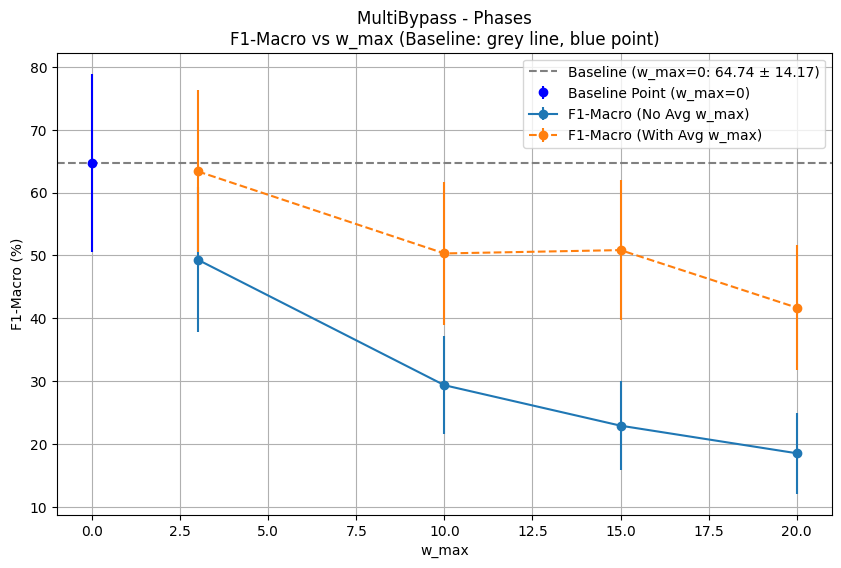

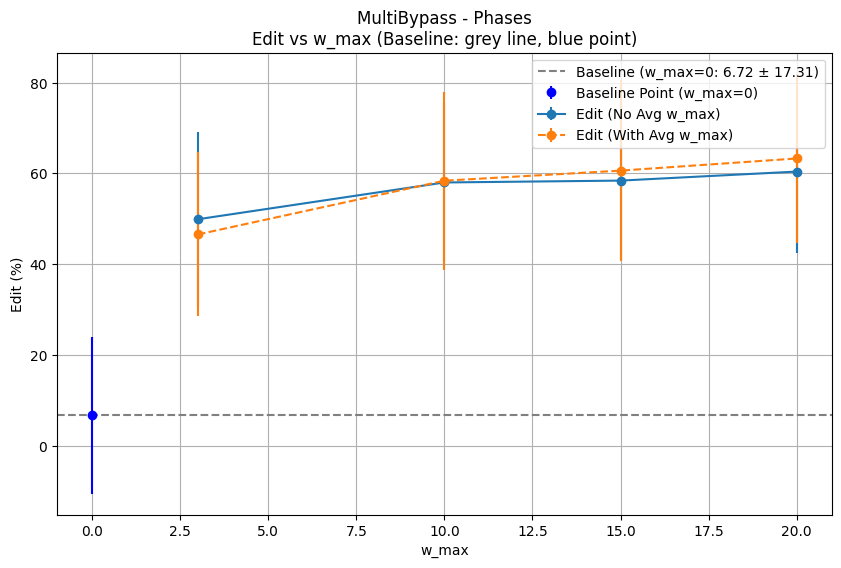

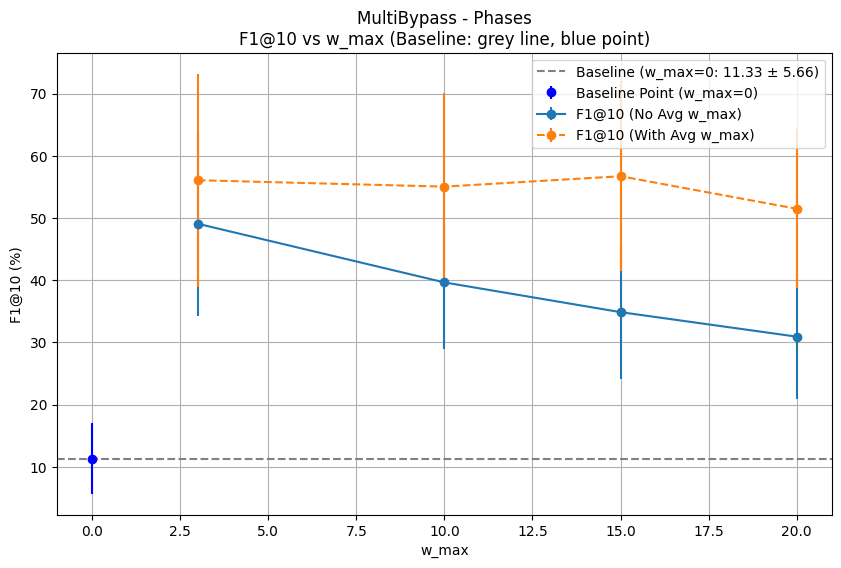

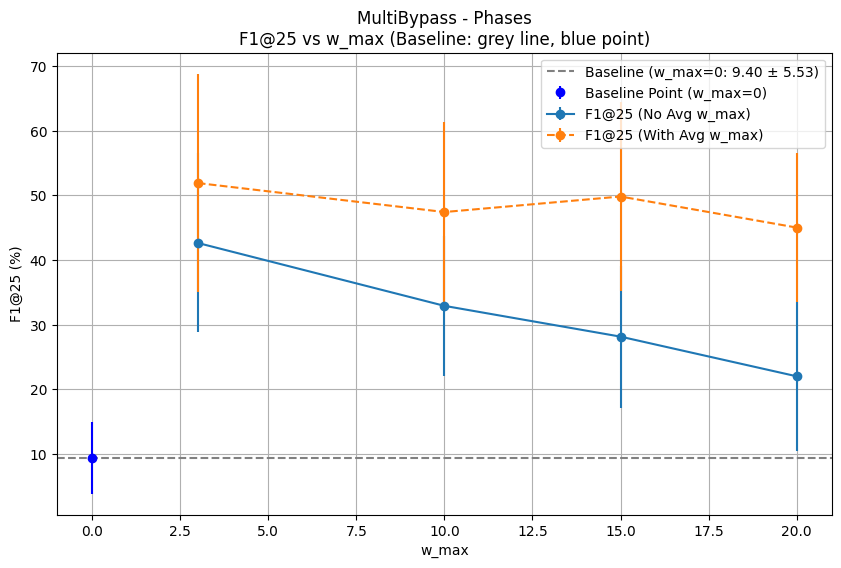

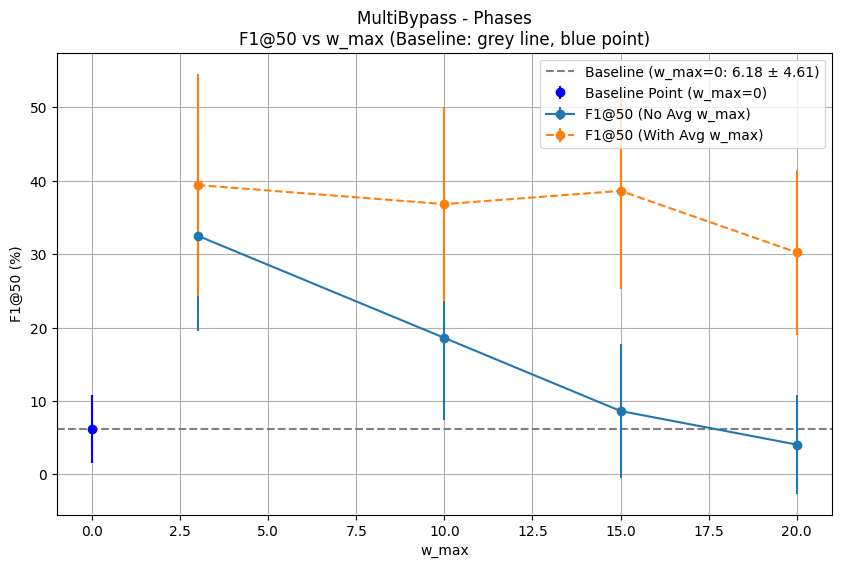

In [14]:
plot_metrics(data)